# Matrices as Linear Transformations

In the previous lessons, we've seen matrices as a way to represent systems of linear equations. Now, we'll explore another, very powerful interpretation: a matrix can be seen as a **linear transformation**.

A linear transformation is a function that takes a point (or vector) in a space and maps it to a new point in a way that preserves lines and keeps the origin fixed. In 2D, you can think of it as a way of stretching, shearing, rotating, or reflecting the entire plane.

---

## The Transformation Process

Let's consider a 2x2 matrix. This matrix will define a transformation that maps any point from an "input" plane to a new point in an "output" plane.

**Transformation Matrix:**  

$
A = \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix}
$

The process is simple: to find where a point `(a, b)` goes, we represent it as a column vector and multiply it by the matrix `A`.  

$
\text{new\_vector} = A \cdot \begin{bmatrix} a \\ b \end{bmatrix}
$


Let's see how this matrix transforms the fundamental building blocks of our plane. The vectors `(1, 0)` and `(0, 1)` are called **basis vectors**. Where they land after the transformation tells us everything about how the entire space is warped.

* **Transforming (1, 0):**
    $ \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} (3)(1)+(1)(0) \\ (1)(1)+(2)(0) \end{bmatrix} = \begin{bmatrix} 3 \\ 1 \end{bmatrix} $
* **Transforming (0, 1):**
    $ \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} (3)(0)+(1)(1) \\ (1)(0)+(2)(1) \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $

Notice that the transformed basis vectors are simply the **columns of the matrix A**!

The visualization below shows how the unit square formed by the original basis vectors is transformed into a parallelogram formed by the columns of our matrix.

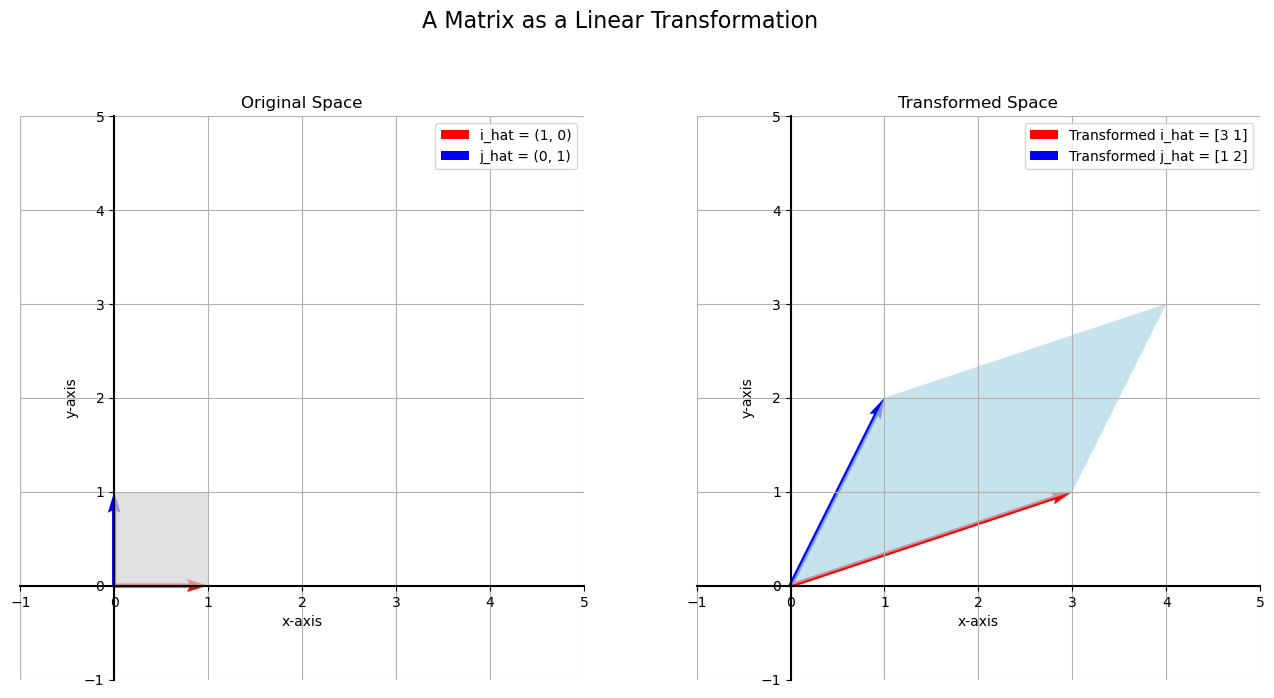

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the transformation matrix ---
A = np.array([[3, 1], [1, 2]])

# --- Define the original basis vectors and the unit square ---
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])
origin = np.array([0, 0])
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# --- Apply the transformation ---
i_hat_transformed = A @ i_hat
j_hat_transformed = A @ j_hat
transformed_square = (A @ square.T).T

# --- Create the plot ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('A Matrix as a Linear Transformation', fontsize=16)

# --- Plot 1: Original Space ---
ax1.quiver(origin[0], origin[1], i_hat[0], i_hat[1], angles='xy', scale_units='xy', scale=1, color='red', label='i_hat = (1, 0)')
ax1.quiver(origin[0], origin[1], j_hat[0], j_hat[1], angles='xy', scale_units='xy', scale=1, color='blue', label='j_hat = (0, 1)')
ax1.fill(square[:, 0], square[:, 1], 'lightgray', alpha=0.7)
ax1.set_title('Original Space')

# --- Plot 2: Transformed Space ---
ax2.quiver(origin[0], origin[1], i_hat_transformed[0], i_hat_transformed[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Transformed i_hat = {i_hat_transformed}')
ax2.quiver(origin[0], origin[1], j_hat_transformed[0], j_hat_transformed[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'Transformed j_hat = {j_hat_transformed}')
ax2.fill(transformed_square[:, 0], transformed_square[:, 1], 'lightblue', alpha=0.7)
ax2.set_title('Transformed Space')

# --- Format both plots ---
for ax in [ax1, ax2]:
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

---

## A Change of Coordinates

Because the transformation is linear, the entire grid of the input space gets warped uniformly. This means we can think of the transformation as a **change of coordinates**.

To find where any point goes, we can express it as a combination of the original basis vectors. For example, the point `(-2, 3)` can be written as:  

> $ (-2, 3) = -2 \cdot (1, 0) + 3 \cdot (0, 1) = -2\hat{i} + 3\hat{j} $

To find its transformed location, we just take the same combination of the *transformed* basis vectors:  

> $ \text{Transformed Point} = -2 \cdot (3, 1) + 3 \cdot (1, 2) = (-6, -2) + (3, 6) = (-3, 4) $

This matches what we get from direct matrix multiplication:  

> $ \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} -2 \\ 3 \end{bmatrix} = \begin{bmatrix} (3)(-2)+(1)(3) \\ (1)(-2)+(2)(3) \end{bmatrix} = \begin{bmatrix} -3 \\ 4 \end{bmatrix} $

---

## The "Apples and Bananas" Analogy

We can also think of this transformation in a data context. Imagine the matrix represents the fruit you buy on two separate days:  

$
\begin{bmatrix}
3 & 1 \\
1 & 2
\end{bmatrix}
\quad
\begin{matrix}
\leftarrow \text{Day 1: 3 apples, 1 banana} \\
\leftarrow \text{Day 2: 1 apple, 2 bananas}
\end{matrix}
$  

The input vector represents the **prices** of the fruit:  

$
\begin{bmatrix} a \\ b \end{bmatrix}
\quad
\begin{matrix}
\leftarrow \text{Price of an apple} \\
\leftarrow \text{Price of a banana}
\end{matrix}
$  

The matrix-vector multiplication transforms a vector of **prices** into a vector of **total daily costs**:  

$
\begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} 3a + b \\ a + 2b \end{bmatrix}
\quad
\begin{matrix}
\leftarrow \text{Total cost on Day 1} \\
\leftarrow \text{Total cost on Day 2}
\end{matrix}
$  

So, if apples and bananas both cost 1 dollar (`a=1`, `b=1`), the transformation sends the price vector `(1, 1)` to the cost vector `(4, 3)`.